In [30]:
import pandas as pd
import numpy as np

In [31]:
mainData = pd.read_csv("vgscore.csv")
mainData = mainData.drop(labels = ['url', 'tot_ship', 'tot_sale', 'na_sale', 'pal_sale', 'jp_sale', 'other_sale', 'last_update'], axis = 1)
mainData.rename(columns = {'title' : 'Name'}, inplace = True)
mainData

,Name,user_Score,release_Date,console,publisher,developer,VGscore
0,Wii Sports,N/A,19th Nov 06,Wii,Nintendo,Nintendo EAD,N/A
1,Super Mario Bros.,8.2,18th Oct 85,NES,Nintendo,Nintendo EAD,N/A
2,Mario Kart Wii,9.1,27th Apr 08,Wii,Nintendo,Nintendo EAD,8.7
3,PlayerUnknown's Battlegrounds,N/A,21st Dec 17,PC,PUBG Corporation,PUBG Corporation,N/A
4,Wii Sports Resort,8.8,26th Jul 09,Wii,Nintendo,Nintendo EAD,8.8
...,...,...,...,...,...,...,...
55859,ZOMBIE GOLD RUSH,N/A,26th Oct 17,NS,Amazing Inc.,Amazing Inc.,N/A
55860,Zombillie,N/A,29th Mar 18,NS,Forever Entertainment S.A.,Forever Entertainment S.A.,N/A
55861,Zone of the Enders: The 2nd Runner MARS,N/A,06th Sep 18,PC,Konami,Cygames,N/A
55862,Zoo Tycoon: Ultimate Animal Collection,N/A,31st Oct 17,XOne,Microsoft Studios,Frontier Developments,N/A


In [32]:
#sorry this is slow but the data has every name entry having spaces...
for c in range(len(mainData)):
    mainData["Name"][c] = mainData["Name"][c].strip()
mainData

,Name,user_Score,release_Date,console,publisher,developer,VGscore
0,Wii Sports,N/A,19th Nov 06,Wii,Nintendo,Nintendo EAD,N/A
1,Super Mario Bros.,8.2,18th Oct 85,NES,Nintendo,Nintendo EAD,N/A
2,Mario Kart Wii,9.1,27th Apr 08,Wii,Nintendo,Nintendo EAD,8.7
3,PlayerUnknown's Battlegrounds,N/A,21st Dec 17,PC,PUBG Corporation,PUBG Corporation,N/A
4,Wii Sports Resort,8.8,26th Jul 09,Wii,Nintendo,Nintendo EAD,8.8
...,...,...,...,...,...,...,...
55859,ZOMBIE GOLD RUSH,N/A,26th Oct 17,NS,Amazing Inc.,Amazing Inc.,N/A
55860,Zombillie,N/A,29th Mar 18,NS,Forever Entertainment S.A.,Forever Entertainment S.A.,N/A
55861,Zone of the Enders: The 2nd Runner MARS,N/A,06th Sep 18,PC,Konami,Cygames,N/A
55862,Zoo Tycoon: Ultimate Animal Collection,N/A,31st Oct 17,XOne,Microsoft Studios,Frontier Developments,N/A


In [33]:
saleData = pd.read_csv("vgsales.csv")
saleData = saleData.drop(labels = ['Rank', 'Year', 'Publisher'], axis = 1)#Platform
saleData

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,Shooter,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,Puzzle,0.00,0.01,0.00,0.00,0.01


In [34]:
finalData = saleData.merge(mainData, left_on=['Name', 'Platform'], right_on=['Name', 'console'])#, sort = True
finalData.drop(labels = ['console'], axis = 1, inplace = True)
finalData

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,user_Score,release_Date,publisher,developer,VGscore
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74,N/A,19th Nov 06,Nintendo,Nintendo EAD,N/A
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24,8.2,18th Oct 85,Nintendo,Nintendo EAD,N/A
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82,9.1,27th Apr 08,Nintendo,Nintendo EAD,8.7
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00,8.8,26th Jul 09,Nintendo,Nintendo EAD,8.8
4,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,30.26,N/A,01st Jun 89,Nintendo,Bullet Proof Software,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15890,Woody Woodpecker in Crazy Castle 5,GBA,Platform,0.01,0.00,0.00,0.00,0.01,N/A,02nd Dec 03,Kemco,Tantalus Interactive,N/A
15891,Men in Black II: Alien Escape,GC,Shooter,0.01,0.00,0.00,0.00,0.01,N/A,07th Feb 03,Infogrames,Melbourne House,N/A
15892,SCORE International Baja 1000: The Official Game,PS2,Racing,0.00,0.00,0.00,0.00,0.01,N/A,28th Oct 08,Activision,Left Field Productions,N/A
15893,Know How 2,DS,Puzzle,0.00,0.01,0.00,0.00,0.01,N/A,28th Oct 10,7G//AMES,Bitfield GmbH,N/A


In [49]:
finalData.sort_values(by = 'Global_Sales', ascending = False, axis = 0,ignore_index = True, inplace = True)
finalData['platformID'] = finalData.groupby('Platform').ngroup()
finalData['genreID'] = finalData.groupby('Genre').ngroup()
finalData['publisherID'] = finalData.groupby('publisher').ngroup()
finalData['developerID'] = finalData.groupby('developer').ngroup()
finalData['user_Score'] = pd.to_numeric(finalData['user_Score'], 'coerce')
finalData['VGscore'] = pd.to_numeric(finalData['VGscore'], 'coerce')
finalData

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,user_Score,release_Date,publisher,developer,VGscore,platformID,genreID,publisherID,developerID
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74,NaN,19th Nov 06,Nintendo,Nintendo EAD,NaN,24,10,353,1459
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24,8.2,18th Oct 85,Nintendo,Nintendo EAD,NaN,10,4,353,1459
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82,9.1,27th Apr 08,Nintendo,Nintendo EAD,8.7,24,6,353,1459
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00,8.8,26th Jul 09,Nintendo,Nintendo EAD,8.8,24,10,353,1459
4,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,01st Jun 89,Nintendo,Bullet Proof Software,NaN,5,5,353,357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15890,Men in Black II: Alien Escape,GC,Shooter,0.01,0.00,0.00,0.00,0.01,NaN,07th Feb 03,Infogrames,Melbourne House,NaN,7,8,240,1295
15891,SCORE International Baja 1000: The Official Game,PS2,Racing,0.00,0.00,0.00,0.00,0.01,NaN,28th Oct 08,Activision,Left Field Productions,NaN,15,6,25,1193
15892,Know How 2,DS,Puzzle,0.00,0.01,0.00,0.00,0.01,NaN,28th Oct 10,7G//AMES,Bitfield GmbH,NaN,4,5,11,289
15893,FairlyLife: MiracleDays,PSP,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,25th Feb 10,Piacci,Piacci,NaN,18,1,388,1591


In [298]:
cleansedData = finalData.drop(['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'publisher', 'developer'], axis = 1)
cleansedData['score'] = cleansedData[['VGscore', 'user_Score']].mean(axis = 1)
cleansedData = cleansedData.drop(['user_Score','VGscore'], axis = 1)
cleansedData['release_Date'] = pd.to_datetime(cleansedData['release_Date'], 'coerce', True, infer_datetime_format = True)
cleansedData.dropna(inplace = True, subset = ['release_Date'])

cleansedData

,Name,Global_Sales,release_Date,platformID,genreID,publisherID,developerID,score
0,Wii Sports,82.74,2006-11-19,24,10,353,1459,NaN
1,Super Mario Bros.,40.24,1985-10-18,10,4,353,1459,8.2
2,Mario Kart Wii,35.82,2008-04-27,24,6,353,1459,8.9
3,Wii Sports Resort,33.00,2009-07-26,24,10,353,1459,8.8
4,Tetris,30.26,1989-06-01,5,5,353,357,NaN
...,...,...,...,...,...,...,...,...
15890,Men in Black II: Alien Escape,0.01,2003-02-07,7,8,240,1295,NaN
15891,SCORE International Baja 1000: The Official Game,0.01,2008-10-28,15,6,25,1193,NaN
15892,Know How 2,0.01,2010-10-28,4,5,11,289,NaN
15893,FairlyLife: MiracleDays,0.01,2010-02-25,18,1,388,1591,NaN


In [299]:
testdata = cleansedData.copy()

#testdata.iloc[0:int(len(testdata)*.25), 1] = 'High'
#testdata.iloc[int(len(testdata)*.25) + 1:int(len(testdata)*.50), 1] = 'Medium'
#testdata.iloc[int(len(testdata)*.50) + 1:int(len(testdata)*.75), 1] = 'Low'
#testdata.iloc[int(len(testdata)*.75) + 1:, 1] = 'Abysmal'

testdata

,Name,Global_Sales,release_Date,platformID,genreID,publisherID,developerID,score
0,Wii Sports,82.74,2006-11-19,24,10,353,1459,NaN
1,Super Mario Bros.,40.24,1985-10-18,10,4,353,1459,8.2
2,Mario Kart Wii,35.82,2008-04-27,24,6,353,1459,8.9
3,Wii Sports Resort,33.00,2009-07-26,24,10,353,1459,8.8
4,Tetris,30.26,1989-06-01,5,5,353,357,NaN
...,...,...,...,...,...,...,...,...
15890,Men in Black II: Alien Escape,0.01,2003-02-07,7,8,240,1295,NaN
15891,SCORE International Baja 1000: The Official Game,0.01,2008-10-28,15,6,25,1193,NaN
15892,Know How 2,0.01,2010-10-28,4,5,11,289,NaN
15893,FairlyLife: MiracleDays,0.01,2010-02-25,18,1,388,1591,NaN


In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [378]:

from datetime import datetime as dt
d = dt.strptime('2010-03-01', '%Y-%m-%d').date()
d
datetime.date(2010, 3, 1)
d.toordinal()
finalizingData['release_Date'].toordinal()

NameError: name 'datetime' is not defined

In [411]:
finalizingData = testdata.drop(labels = ["Name",'release_Date', "score"], axis = 1)


##finalizingData.iloc[0:int(len(testdata)*.3333333333333333333333), 0] = int(2)
##finalizingData.iloc[int(len(testdata)*.3333333333333333333333):int(len(testdata)*.6666666666666666666666667), 0] = int(1)
##finalizingData.iloc[int(len(testdata)*.6666666666666666666666667):, 0] = int(0)


##finalizingData.iloc[0:int(len(testdata)*.25), 0] = int(3)
##finalizingData.iloc[int(len(testdata)*.25):int(len(testdata)*.50), 0] = int(2)
##finalizingData.iloc[int(len(testdata)*.50):int(len(testdata)*.75), 0] = int(1)
##finalizingData.iloc[int(len(testdata)*.75):, 0] = int(0)


##finalizingData.iloc[0:int(len(testdata)*.20), 0] = int(4)
##finalizingData.iloc[int(len(testdata)*.20):int(len(testdata)*.40), 0] = int(3)
##finalizingData.iloc[int(len(testdata)*.40):int(len(testdata)*.60), 0] = int(2)
##finalizingData.iloc[int(len(testdata)*.60):int(len(testdata)*.80), 0] = int(1)
##finalizingData.iloc[int(len(testdata)*.80):, 0] = int(0)

for i in range(4):
    finalizingData.iloc[int(len(testdata)*(i*.25)):int(1+len(testdata)*((i+1)*.25)), 0] = int(4-i)
    
##for i in range(10):
##    finalizingData.iloc[int(len(testdata)*(i*.1)):int(1+len(testdata)*((i+1)*.1)), 0] = int(10-i)

    
##for i in range(12):
##    finalizingData.iloc[int(len(testdata)*(i*.083333333333333)):int(1+len(testdata)*((i+1)*.083333333333333)), 0] = int(11-i)

xtrain, xtest, ytrain, ytest = train_test_split(finalizingData.drop(labels = "Global_Sales", axis = 1), finalizingData["Global_Sales"].astype("int32"), test_size = .25)


y_test = ytest.to_numpy()
finalizingData

,Global_Sales,platformID,genreID,publisherID,developerID
0,4.0,24,10,353,1459
1,4.0,10,4,353,1459
2,4.0,24,6,353,1459
3,4.0,24,10,353,1459
4,4.0,5,5,353,357
...,...,...,...,...,...
15890,1.0,7,8,240,1295
15891,1.0,15,6,25,1193
15892,1.0,4,5,11,289
15893,1.0,18,1,388,1591


In [412]:
#notes- 
#Using name might be a bit too baised to series, but still could work
#Everything should be able to be ID'd in some way, forgot the name of it but we did it with the text message thing for spam/ham
#That'd be good for names if we were to do it, each unique genre/console/publisher/developer should be given a wholly unique
#single ID.
#Scores should be averaged together where available to reduce columns by one, perhaps we shoot for the total sales as well and 
#drop inidivudal categories of sales.

#Date could be months since the earliest entry or just like 1980
#Could eventually use the day to nudge/round the month or even check which day of the week it released on, like sunday/monday/
#friday

#Julian timestamps

In [413]:
dtree = DecisionTreeClassifier()
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

Correct Prediction:  42.86075309577963 %
One away Predictions:  36.64392216325499 %
Two away Predictions:  16.401314126863788 %
Three away Predictions:  4.094010614101592 %

1 or less Away Prediction:  79.50467525903461 %
2 or less Away Prediction:  95.90598938589841 %
AxesSubplot(0.125,0.125;0.62x0.755)


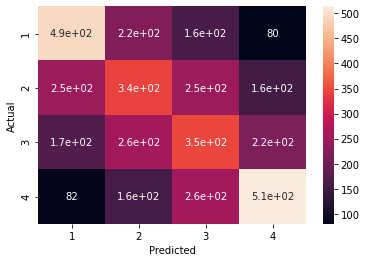

In [414]:
prediction = dtree.predict(xtest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(prediction)):
    if(prediction[i] == (y_test[i])):
        accuracy+=1
    elif(prediction[i] == (y_test[i]-1) or (prediction[i] == (y_test[i]+1))):
          oneOff+=1
    elif(prediction[i] == (y_test[i]-2) or (prediction[i] == (y_test[i]+2))):
          twoOff+=1
    elif(prediction[i] == (y_test[i]-3) or (prediction[i] == (y_test[i]+3))):
          threeOff+=1
print("Correct Prediction: ",accuracy/len(prediction)*100,"%")
print("One away Predictions: ",oneOff/len(prediction)*100,"%")
print("Two away Predictions: ",twoOff/len(prediction)*100,"%")
print("Three away Predictions: ",threeOff/len(prediction)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(prediction)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(prediction)*100,"%")

data = {'y_Predicted': prediction, 'y_Actual':    ytest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=True))

In [415]:
randomforest = RandomForestClassifier()
randomforest.fit(xtrain, ytrain)

RandomForestClassifier()

Correct Prediction:  44.806671721000754 %
One away Predictions:  36.92191053828658 %
Two away Predictions:  15.011372251705838 %
Three away Predictions:  3.2600454890068233 %

1 or less Away Prediction:  81.72858225928734 %
2 or less Away Prediction:  96.73995451099317 %
AxesSubplot(0.125,0.125;0.62x0.755)


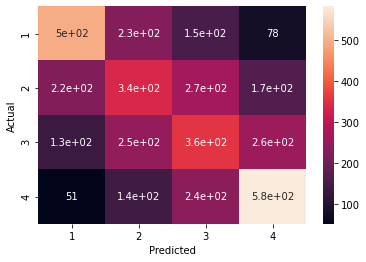

In [416]:
ranPredict = randomforest.predict(xtest)

accuracy = 0
oneOff = 0
twoOff = 0
threeOff = 0
for i in range(len(ranPredict)):
    if(ranPredict[i] == (y_test[i])):
        accuracy+=1
    elif(ranPredict[i] == (y_test[i]-1) or (ranPredict[i] == (y_test[i]+1))):
          oneOff+=1
    elif(ranPredict[i] == (y_test[i]-2) or (ranPredict[i] == (y_test[i]+2))):
          twoOff+=1
    elif(ranPredict[i] == (y_test[i]-3) or (ranPredict[i] == (y_test[i]+3))):
          threeOff+=1
print("Correct Prediction: ",accuracy/len(prediction)*100,"%")
print("One away Predictions: ",oneOff/len(prediction)*100,"%")
print("Two away Predictions: ",twoOff/len(prediction)*100,"%")
print("Three away Predictions: ",threeOff/len(prediction)*100,"%")

print()
print("1 or less Away Prediction: ",(accuracy+oneOff)/len(prediction)*100,"%")
print("2 or less Away Prediction: ",(accuracy+oneOff+twoOff)/len(prediction)*100,"%")

data = {'y_Predicted': ranPredict, 'y_Actual':    ytest}
df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(sn.heatmap(confusion_matrix, annot=True))